In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

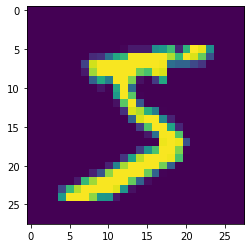

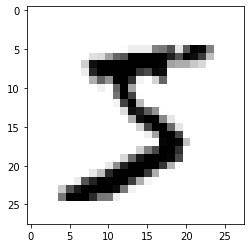

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

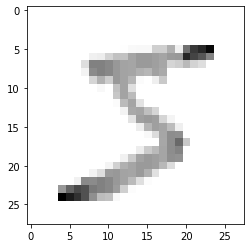

In [6]:
# Normalise the Datasets
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [8]:
# After Normalize
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [7]:
print(Y_train[0])

5


In [8]:
# Resizing Image to make it suitable for applying Convolutional Operation
import numpy as np
IMG_SIZE = 28
X_trainr = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_testr = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Sample Dimension: ", X_trainr.shape)
print("Testing Sample Dimension: ", X_testr.shape)

Training Sample Dimension:  (60000, 28, 28, 1)
Testing Sample Dimension:  (10000, 28, 28, 1)


In [9]:
# Create a Deep Neural Network 
# Training on 60,000 Samples of MNIST Handwritten Dataset

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [11]:
# Create a Neural Network 
model = Sequential()

# First Convolutional Layer ---> Layer 0 1 2 3 (60000, 28, 28, 1)
model.add(Conv2D(64, (3,3), input_shape = X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional Layer ---> Layer 4 5 6 7 (60000, 28, 28, 1)
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third Convolutional Layer ---> Layer 8 9 10 11 (60000, 28, 28, 1)
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully Connected Layer #1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# Fully Connected Layer #2
model.add(Dense(32))
model.add(Activation("relu"))

# Last Fully Connected Layer 
model.add(Dense(10))
model.add(Activation("softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [13]:
print("Total Training Samples: ", len(X_trainr))

Total Training Samples:  60000


In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [15]:
model.fit(X_trainr, Y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 54s 41ms/step - loss: 0.3192 - accuracy: 0.8985 - val_loss: 0.1221 - val_accuracy: 0.9627
Epoch 2/5
1313/1313 [==============================] - 57s 44ms/step - loss: 0.1024 - accuracy: 0.9696 - val_loss: 0.1049 - val_accuracy: 0.9670
Epoch 3/5
1313/1313 [==============================] - 62s 47ms/step - loss: 0.0727 - accuracy: 0.9775 - val_loss: 0.0796 - val_accuracy: 0.9760
Epoch 4/5
1313/1313 [==============================] - 63s 48ms/step - loss: 0.0566 - accuracy: 0.9818 - val_loss: 0.0806 - val_accuracy: 0.9758
Epoch 5/5
1313/1313 [==============================] - 57s 44ms/step - loss: 0.0475 - accuracy: 0.9858 - val_loss: 0.0668 - val_accuracy: 0.9791


In [16]:
# Evaluating on Testing dataset MNIST
test_loss, test_acc = model.evaluate(X_testr, Y_test)
print("Test Loss on 10000 Test Samples: ", test_loss)
print("Validation Accuracy on 10000 test samples: ", test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0604 - accuracy: 0.9817
Test Loss on 10000 Test Samples:  0.06041697412729263
Validation Accuracy on 10000 test samples:  0.9817000031471252


In [17]:
prediction = model.predict(X_testr)

313/313 [==============================] - 5s 14ms/step


In [18]:
print(prediction)

[[1.37697009e-06 2.63407424e-06 5.23733070e-05 ... 9.99928832e-01
  6.32680212e-07 8.70256918e-06]
 [2.69437296e-05 2.64750179e-06 9.99950409e-01 ... 7.83034193e-06
  2.22490439e-06 1.26852024e-06]
 [1.06422668e-07 9.99998093e-01 3.18282616e-07 ... 1.41247824e-07
  3.63685018e-07 1.67877246e-07]
 ...
 [8.85302320e-09 1.67662250e-07 1.86561351e-07 ... 6.65050607e-07
  4.49161853e-05 4.54247565e-05]
 [3.20341485e-07 1.18623209e-08 4.89733694e-08 ... 2.24974652e-08
  3.37018027e-05 8.80307653e-06]
 [2.75765833e-05 9.88830777e-08 1.72569671e-05 ... 1.19946435e-08
  2.08879028e-05 2.09758059e-06]]


In [19]:
print(np.argmax(prediction[0]))

7


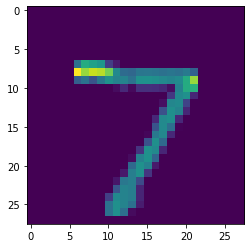

In [20]:
plt.imshow(X_test[0])

In [21]:
print(np.argmax(prediction[178]))

1


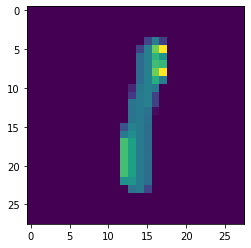

In [22]:
plt.imshow(X_test[178])

In [26]:

import cv2

In [29]:
img = cv2.imread('./one.png')

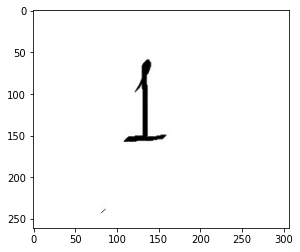

In [30]:
plt.imshow(img)

In [31]:
img.shape

(261, 307, 3)

In [32]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [33]:
gray.shape

(261, 307)

In [34]:
resized = cv2.resize(gray, (28, 28), interpolation= cv2.INTER_AREA)

In [35]:
resized.shape

(28, 28)

In [36]:
newImg = tf.keras.utils.normalize(resized, axis=1)

In [37]:
newImg = np.array(newImg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [38]:
newImg.shape

(1, 28, 28, 1)

In [39]:
prediction = model.predict(newImg)

1/1 [==============================] - 0s 98ms/step


In [40]:
print(np.argmax(prediction))

0
